<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week6_LectureSlides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222
# Week 6

## Linear Regression


## Topics

* Multivariable Linear Regression





In the last videos, we looked at single variable regression where our model was

$Y = \alpha + \beta X + \epsilon$


We now extend to the case where we have several predictor variables, which we denote $X_j$.  In particular,

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdot + \beta_p X_p + \epsilon$


Note that we have replaced $\alpha$ with $\beta_0$.

If have observe $N$ data points, it mean that we have a $N \times (p+1)$ data matrix 

$$A = \begin{bmatrix} \mathbf{1_N} & \mathbf{x}_1 & \mathbf{x}_2 &  \cdots & \mathbf{x}_p \\ \end{bmatrix} $$

where the column vectors $\mathbf{x}_j$ are data for variable $X_j$.

We denote the column vectors  $Y$ and $\mathbf{\epsilon}$ as before 

and the column vector 

$$\mathbf{b} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \\ \end{bmatrix} $$

Then our regression problem can be specified as

$$A \mathbf{b} + \mathbf{\epsilon} = \mathbf{y} $$


All the math works like before, and the regression coefficients will be

$$\mathbf{b} = (A^TA)^{-1}A^T\mathbf{y}$$






#### Example

Let's grab some financial data for S&P500, Russell2000, the 10 Year Treasury Rate, and Gold. 

We will perform a linear regression to predict the log-price change in gold with log price changes of the indices and the absolute rate changes in the 10 year treasury rate.   We will use five years of data.


In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 8.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import yfinance as yf

import pandas as pd

import statsmodels.api as sm



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tickers = ["^GSPC", "^RUT", "^TNX" ,"GC=F"]

data = yf.download(tickers, start = "2017-01-01", end = "2022-01-01")

[*********************100%***********************]  4 of 4 completed


In [ ]:
data1 = np.log(data.Close.iloc[:,0:3]).diff()

data1["TNX"] = data.Close.iloc[:,-1].diff()

data1 = data1.dropna()

data1.head()


,GC=F,^GSPC,^RUT,TNX
Date,,,,
2017-01-04,0.002926,0.005706,0.016314,0.002
2017-01-05,0.013570,-0.000771,-0.011602,-0.084
2017-01-06,-0.006634,0.003511,-0.003402,0.050
2017-01-09,0.009850,-0.003555,-0.007186,-0.042
2017-01-10,0.000591,0.000000,0.009830,0.003


Before we start, let's do a pair plot.

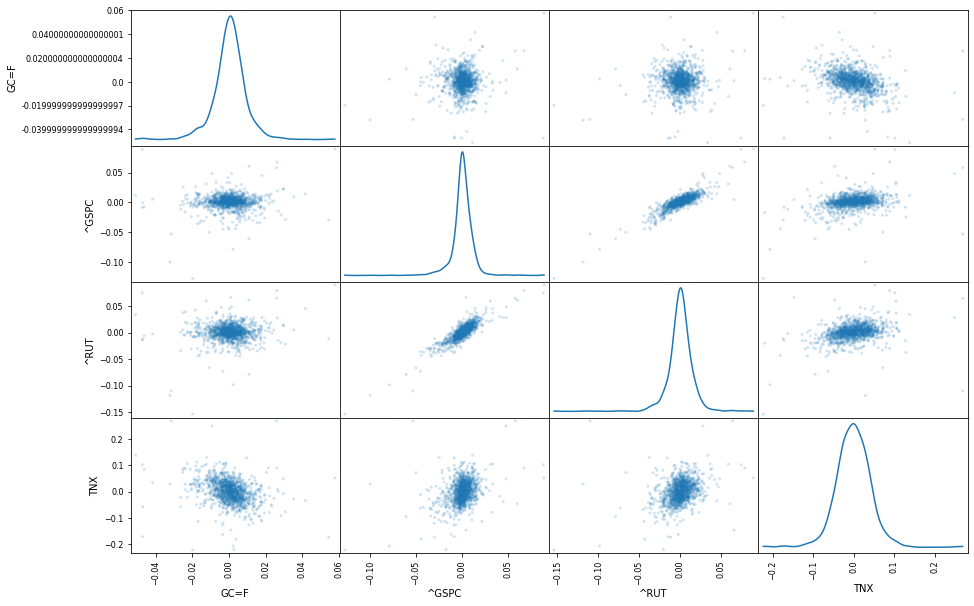

In [ ]:
pd.plotting.scatter_matrix(data1, figsize = (15,10),diagonal='kde' ,alpha=0.2)

plt.show()

This doesn't suggest a strong regression, but the plot only gives us a look at two variables at a time.

In [ ]:
model = sm.OLS(data1["TNX"], data1.iloc[:,0:3])
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TNX   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              127.8
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    3.06e-72
Time:                        23:01:13   Log-Likelihood:                          2322.7
No. Observations:                1255   AIC:                                     -4639.
Df Residuals:                    1252   BIC:                                     -4624.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F          -1.6140      0.119    -13.596      0.000      -1.847      -1.381
^GSPC          0.7655      0.182      4.197      0.000       0.408       1.123
^RUT           0.4727      0.143      3.314      0.001       0.193       0.752
==============================================================================
Omnibus:                      219.764   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2914.472
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                      10.429   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Oh wait, we forgot to make a constant column.  Easy enough.

In [ ]:
data1C = sm.add_constant(data1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
modelC = sm.OLS(data1C["TNX"], data1C.iloc[:,0:4])
resultC = modelC.fit()

resultC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TNX   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.15e-72
Time:                        23:01:24   Log-Likelihood:                 2323.0
No. Observations:                1255   AIC:                            -4638.
Df Residuals:                    1251   BIC:                            -4617.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.707      0.480      -0.003       0.001
GC=F          -1.6108      0.119    -13.555      0.000      -1.844      -1.378
^GSPC          0.7727      0.183      4.229      0.000       0.414       1.131
^RUT           0.4690      0.143      3.285      0.001       0.189       0.749
==============================================================================
Omnibus:                      219.744   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2908.665
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                      10.421   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the constant probably is irrelevant here.

Interestingly, the coefficients have small p-values, suggesting that there is *some* kind of relationship. 

## Interpreting the output

We will discuss some the common metrics that are aasociated with liner regression and we will see that many of them show up in the standard output of OLS above.




### Standard Errors.


Assuming the model is correct, but we just don't know coefficients, we can compute the standard deviation of our estimators for the coefficients (ignoring for the moment the constant term).  

Recall from the single variable case that $\hat{\beta} = \sum_i^N w_i y_i$  where

$$w_i = \frac{x_i - \bar{x}}{N\mathrm{Var}(x)}$$


In the true model, $y_i = \alpha + \beta x_i + \epsilon_i $, hence

$$\mathrm{Var}(y_i| \mathbf{x}) = \mathrm{Var}(\epsilon_i) = \sigma_{\epsilon}^2$$

since the errors are IID.

Hence,

$$\mathrm{Var}(\hat{\beta}| \mathbf{x})= \sum_{i=1}^N w_i^2\mathrm{Var}(y_i|\mathbf{x})\\
= \sigma_{\epsilon}^2\sum_{i=1}^N w_i^2$$

This means that if we knew in advance $\sigma_{\epsilon}^2$ we would know the variance of our estimator $\hat{\beta}$

We don't know that.  But we **DO** have an estimate for $\sigma_{\epsilon}^2$.  Namely, we use the sample residual
$\hat{\epsilon}_i = \hat{y}_i - y_i$ and compute

$$\hat{\sigma}_{\epsilon}^2=\frac{1}{N-1} \sum_{i=1}^N (\hat{\epsilon_i} - \bar{\hat{\epsilon_i}}   )^2 $$


(Note that if we have an intercept,  $\bar{\hat{\epsilon_i}} = 0$)


Therefore, our standard estimate for the variance of $\hat{\beta}$ is

$$SE_{\hat{\beta}} = \sqrt{\hat{\sigma}_{\epsilon}^2\sum_{i=1}^N w_i^2}$$

and we apply the t distribution with $N-p-1$ degrees freedom to this value (Actually, should be dfR - see below).


There are formulas like this for each coefficient in a multi-variable regression including any constant.  

These standard errors are then used to produce a t-stastic, a $p$ value, and confidence intervals. See the OLS output summry above.


**Comment**

The p-values for  given coefficient represent the p-value associted with null hypotheis that the model is true, but the particular coefficient is $0$.  If the p-value is very small, this contradicts the null hypothesis.  This can either mean that the model is true and coefficient is *not* zero, or the model is not true. But in the latter case, we would likely be correct to believe that there is *some* relationship between the given variable and $y$.









### SSE, SSM, SST, $R^2$


Before we even look at the $X_j$ variables (the predictors), the $Y$ vector will have its own variance.  It is

$$\mathrm{Var}(y) = \frac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2$$


But another way to describe this is to forget the $N$ (for the moment) and just calculate the total sum-squared deviation of $y$

$$SST = \sum_{i=1}^N (y_i - \bar{y})^2$$

Previously, we discussed minimizing the sum squared residuals of the model,let's call the SSE (for Sum Squared Error):

$$SSE = \sum_{i=1}^N (\hat{y}_i - y_i)^2$$

Analogous to $SST$, we can calculate $SSM$ (Sum squared model).  It just replaces $y$ with $\hat{y}$ in $SST$

$$SSM = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2$$

This is also sometimes call the Regression Sum-Squared.  But RSS would be amiguous then.


There two things you'll want to know.

1. Under typical circumstances, $SST = SSE + SSM$

What are those circumstances?  Either the model has a constant term, or the $Y$ data is centered so that $\bar{y} =0$.

To see this, we write

$$ SSE + SSM = \sum_{i=1}^N (\hat{y}_i - y_i)^2 + \sum_{i=1}^N (\hat{y}_i - \bar{y})^2\\
=  \sum_{i=1}^N \left(\hat{y}_i^2 - 2\hat{y}_i y_i + y_i^2 +  \hat{y}_i^2 -2\hat{y}_i\bar{y} + \bar{y}^2                 \right)\\
=2\sum_{i=1}^N (\hat{y}_i^2  - \hat{y}_i y_i - \hat{y}_i\bar{y}) + \sum_{i=1}^N  y_i^2 + N \bar{y}^2\\
= 2\sum_{i=1}^N \hat{y}_i(\hat{y}_i  -  y_i)  -2\sum_{i=1}^N  \hat{y}_i\bar{y}+ \sum_{i=1}^N  y_i^2 + N \bar{y}^2  $$


However, we first recall that the residual vector is in the orhtogonal complement of of column space of the data matrix (where $\hat{\mathbf{y}}$ lives.  So the firsts summation is zero as it is their innner product. We now have



$$ SSE + SSM =-2\bar{y}\sum_{i=1}^N  \hat{y}_i+ \sum_{i=1}^N  y_i^2 + N \bar{y}^2$$

In the caes that $\bar{y} = 0$ (centered data), the result immediately follows.  

In the case that there is a constant, the column vecotor of ones is in the column space of $A$.  It follows that $\sum_{i=1}^N  \hat{y}_i = N\bar{y}$ and the result follows anyway. 




2. The values $R^2$ associated with the regression, is the ratio $R^2 = \frac{SSM}{SST}$

It is commonly referred to as the percentage of the variance explained by the model (makes sense if wew divide numerator and denominator by $N$).


Note that in the output above, the $R^2$ is reported as being "uncentered".  That means in calculated the ratio 
$R^2 = \frac{SSM}{SST}$ but did not check that $SSM + SSE = SST$  This matters because sometimes people compute $R^2$ as 

$$R^2 = 1- \frac{SSE}{SST}$$

### Degrees Freedom

The total degrees freedom is the number of observation of $y$. $\text{dfT}= N$

If the model uses $p$ variables, we would say that the model has $p$ degrees freedom.  $\text{dfM} = p$

If the data has $dfT$ degrees freedom and the model has $dfM$ degrees freedom, then the residuals have $dfR = dfT- dfM$ degrees freedom


The concept here is that the $y$ vector lives in $\mathbb{R}^N$ and the column space of the data matrix lives in a $p$ dimensional subspace of  $\mathbb{R}^N$.  Hence, the error vectors will live in a $N-p$ dimensional subspace of $\mathbb{R}^N$.

However, we will some slight adjustments to this if we have either centered the $Y$ data, or are using an constant in the linear regression.


If we center the $Y$ data, then the total degrees freedom becomes $N -1$.

If there is an intercept (not the same thing as centering y), the residual df is reduced by 1 to $N-p -1$















### F test

The t-test for the individual coefficients test whether a certain coefficient is zero. But is not uncommon that the data do compel us that any one coefficient is not zero.  Nevertheless, the model might be quite useful.  

We seek a test where the null hypotheis is that *all* of the coefficients are zero.


There is such a test.  It is the F test.

The F statistic is

$$F = \frac{\frac{SSM}{dfM}}{\frac{SSE}{dfE}}$$

and the degrees freedom are the pair $(dfM, dfE)$ (the F distribution has two DFs associated with it).

A small p-value here suggest that either

1) That the model is true but at least one of the coefficients is *not* zero (good).

2) The model is not true. But again, in this case, it strongly suggests that there is some relationship between the target $Y$ and the variables $X_j$.



### Adjusted $R^2$

When we add more predicters, the $R^2$ will always go up.  Recall that, in the case of an intercept, 
$$R^2 = \frac{SSM}{SST} = 1- \frac{SSE}{SST}$$ 

The fraction $\frac{SSE}{SST}$ is often referred to as the unexplained variance.  But an adjustment would be to divivde each by their degrees freedom. 

$$R_{adj} = 1 - \frac{\frac{SSE}{N-p-1}}{\frac{SST}{N-1}}$$ 

Note that we use $N-1$ for SST because it is calculated relative to $\bar{y}$.  In other words, each is an ubiased estimate of the respective variances.



### Log-Liklihood, AIC, BIC

The model assumes that the residuals are distibuted normally with variance $\sigma^2$. That means we can calculate the log-liklihood as

$$\ell(\hat{\sigma}_{\epsilon}) = -N\frac{1}{2}\ln(2\pi) - N\ln(\hat{\sigma}_{\epsilon}) - \frac{1}{2}\sum_{i=1}^N\frac{\epsilon_i^2}{\hat{\sigma}_{\epsilon}^2}\\
=-\frac{N}{2}\ln(2\pi) - N\ln(\hat{\sigma}_{\epsilon}) -\frac{1}{2}(N-p-1)$$



From this, we can immediately calculate the AIC and BIC since

$$AIC = -2\ell + 2(p+1)$$ 

(or $-2\ell + 2(p)$  if there is no intercept).

and

$$BIC = -2\ell + p\ln(N)$$


We can use these to determine whether including more predictor variables has sufficiently improved the model.




### Normality of the residuals

The assumptions underlying linear regression include the assumption that the error term is normally distributed.  Consequently, the residuals should appear to be normally distributed.  We have previosly discussed various tests of normality and two are included in the OLS output. One is the Jarque-Bera test (looks at skew and kurtosis).  The other is the omnibus test (which we did not previously disscuss).  We will talk about this more next week along with some of the other reported values (Durban-Watson and condition number). 





### Example

Let manually calculate the regression done above (with a constant) and see if we can replicte  the output we have discussed.  

Just to recall:


In [ ]:
modelC = sm.OLS(data1C["TNX"], data1C.iloc[:,0:4])
resultC = modelC.fit()

resultC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TNX   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     127.8
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           3.15e-72
Time:                        00:25:59   Log-Likelihood:                 2323.0
No. Observations:                1255   AIC:                            -4638.
Df Residuals:                    1251   BIC:                            -4617.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.707      0.480      -0.003       0.001
GC=F          -1.6108      0.119    -13.555      0.000      -1.844      -1.378
^GSPC          0.7727      0.183      4.229      0.000       0.414       1.131
^RUT           0.4690      0.143      3.285      0.001       0.189       0.749
==============================================================================
Omnibus:                      219.744   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2908.665
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                      10.421   Cond. No.                         209.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We make our own data matrix from the data frame but turn it into a numpy array so we can calculate what we need easily.

In [ ]:
y = np.array(data1C["TNX"])
A = np.array(data1C.iloc[:,0:4])
N  = len(y)
print("Total df is (number of observations is N = ",N)
p = 3

print("The model degrees freedom is ", p)

print("The residuals degree freedom is ", N-(p+1))


Total df is (number of observations is N =  1255
The model degrees freedom is  3
The residuals degree freedom is  1251


Get the estimates

In [ ]:
b = np.linalg.pinv(A)@y
b

array([-7.61789910e-04, -1.61076726e+00,  7.72733092e-01,  4.68973136e-01])

Get $\hat{y}_i$s and $\hat{\epsilon}_i$s

In [ ]:
yhat = A@b

ehat = yhat - y

Check that the $\hat{y}$ and $\hat{\epsilon}$ vectors are orthogonal.

In [ ]:
yhat@ehat

1.736078728692414e-16

Since we have an intercept, check that the sum of the residuals is zero.

In [ ]:
ehat.sum()

9.325873406851315e-15

Cacluate SST, SSE and SSM

In [ ]:
SST = np.sum((y - y.mean())**2)
SST

2.3690101745082046

In [ ]:
SSE = ehat@ehat
SSE

1.8131711150528869

In [ ]:
SSM = np.sum((yhat - y.mean())**2)
SSM

0.5558390594553178

Verify that SST = SSE + SSM

In [ ]:
SSE + SSM

2.3690101745082046

Calculate $R^2$ and $R_{adj}^2$

In [ ]:
R2 = SSM/SST

R2adj = 1- (SSE/(N - p-1))/ (SST/(N-1))

print("R squared is ", R2)
print("Adjusted R squared is ", R2adj)


R squared is  0.23462924112206793
Adjusted R squared is  0.2327938196379482


Calculate the F stastistic and get its pvalue

In [ ]:
F = (SSM/p)/(SSE/(N-p-1))
print(F)

127.83398426579656


In [ ]:
ss.f.sf(F,dfn = p, dfd = N-p-1)  # the survival function is just 1- CDF 

3.154992993685822e-72

Log-liklihood  $$\ell =-\frac{N}{2}\ln(2\pi) - N\ln(\hat{\sigma}_{\epsilon}) -\frac{1}{2}(N-p-1)$$


So we need $\hat{\sigma}_{\epsilon}$

In [ ]:
sigma_est = np.sqrt(SSE/(N-p-1))

LLH = -.5*N*np.log(2*np.pi) - N*np.log(sigma_est) - .5*(N-p-1)

print("The log-liklihood is ", LLH)

The log-liklihood is  2322.961944379941


AIC and BIC

In [ ]:
AIC = -2*LLH + 2*(p+1)
print("The AIC is ", AIC)

BIC = -2*LLH + (p+1)*np.log(N)
print("The BIC is ", BIC)

The AIC is  -4637.923888759882
The BIC is  -4617.384325353619


Jarque-Berra, skew and kurtosis  

In [ ]:
ss.skew(ehat), ss.kurtosis(ehat, fisher = False) 

(-0.37132813914013696, 10.421073304407306)

**Comments**  They appear to have defined $\hat{\epsilon} = y  - \hat{y}$ So the sign is reversed for skew.

Also, the reported kurtois is not the excess kurtosis but the actual kurtosis.


In [ ]:
ss.jarque_bera(ehat)

(2908.664729500214, 0.0)

In scipy stats, the omnibus test is called "normaltest"


In [ ]:
ss.normaltest(ehat)

NormaltestResult(statistic=219.74446432962498, pvalue=1.9190922713385813e-48)

We will discuss the remaining output later.

### Variance Inflation Factors


We know from our pairs plot and (probably anyway) that the the Russell2000 and S&P500 are highly correlated. This may lead to some instability if the regressed coefficients depending on whether both are included in the model or not.    

For example, lets do the regression with Russell taken out.

In [ ]:
modelCnoR = sm.OLS(data1C["TNX"], data1C.iloc[:,0:3])
resultCnoR = modelCnoR.fit()

resultCnoR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TNX   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     184.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           4.36e-71
Time:                        00:38:15   Log-Likelihood:                 2317.6
No. Observations:                1255   AIC:                            -4629.
Df Residuals:                    1252   BIC:                            -4614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.824      0.410      -0.003       0.001
GC=F          -1.5968      0.119    -13.394      0.000      -1.831      -1.363
^GSPC          1.2980      0.089     14.612      0.000       1.124       1.472
==============================================================================
Omnibus:                      181.849   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1976.854
Skew:                           0.251   Prob(JB):                         0.00
Kurtosis:                       9.128   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice how the S&P500 coefficient is now much larger.   It's almost as if we didn't need the Russell (not quite though, look at the AIC).  That is, the Russell might be redundant becaues we can proxy it with the S&P500. 

One way to diagnose whether a predictor variable is "redundant" is the Variance Inflation Factor or VIF.

The VIF of a particular variable is obtained by creating a linear regression where the other predictor variables attempt to predict the particular variables.

One then computes $$VIF = \frac{1}{1-R^2}$$

If the $R^2$ is close to 1, then VIF is large and this indicates that the variable might be redundant.  

Let's calculate this for the Russell.

In [ ]:
model = sm.OLS(data1C["^RUT"], data1C.iloc[:,0:3])
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ^RUT   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     2058.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:41:59   Log-Likelihood:                 4355.1
No. Observations:                1255   AIC:                            -8704.
Df Residuals:                    1252   BIC:                            -8689.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.292      0.197      -0.001       0.000
GC=F           0.0299      0.024      1.271      0.204      -0.016       0.076
^GSPC          1.1200      0.018     63.933      0.000       1.086       1.154
==============================================================================
Omnibus:                      176.220   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.254
Skew:                           0.272   Prob(JB):                         0.00
Kurtosis:                       8.737   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Calculating the VIF for Rusell from the output
1/(1-.767)

4.291845493562232

Naturally, the statsmodels package will do this for us.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.10.2'

In [ ]:
VIF(data1C.iloc[:,0:4].values, 3)

4.2870900749623875

The first input is the data frame of predictors.  The second is the index you wish to compute the VIF for.  Russell 2000 has index 3.

We can get them all of course.

In [ ]:
for idx in range(4):
    print(VIF(data1C.iloc[:,0:4].values,idx))

1.0054252497694292
1.0052453048165297
4.281571055301959
4.2870900749623875


One way to interpret this is that including the other predictors increses or inflates the variance of the estimated coefficient by the VIF.  Is $4.28$ a bad number?   CW is that $5$ is a red flag, but regardless, $4.28$ means that the standard error is more than doubled.

## Covariance Matrix of the $\beta$ estimates

We are interested in the Covariance Matrix for the $\beta$ estimates.  Linear Algreba is helpful here.


Recall that

$$\hat{\mathbf{\beta}} = (A^TA)^{-1}A^T\mathbf{y}$$


Hence, 

$$\mathrm{Cov}(\hat{\mathbf{\beta}},\hat{\mathbf{\beta}}^T|\mathbf{x} )\\
=\mathrm{Cov}\left((A^TA)^{-1}A^T\mathbf{y},((A^TA)^{-1}A^T\mathbf{y})^T|\mathbf{x} \right)\\
(A^TA)^{-1}A^T\mathrm{Cov}\left(\mathbf{y},((A^TA)^{-1}A^T\mathbf{y})^T|\mathbf{x} \right)\\
(A^TA)^{-1}A^T\mathrm{Cov}\left(\mathbf{y},\mathbf{y})^T|\mathbf{x} \right)A(A^TA)^{-T}$$

The last two due to the bilinearity of the Covariance operator.  Next, we observ that 

$$\mathrm{Cov}\left(\mathbf{y},\mathbf{y})^T|\mathbf{x} \right) = \hat{\sigma}_{\epsilon}^2 I_N$$

where  $I_N$ is the $N \times N$ identity matrix.

This is because the $y$'s are IID and the variance due to the $x$ variables is explained, leaving only the unexplained.


Hence,


$$\mathrm{Cov}(\hat{\mathbf{\beta}},\hat{\mathbf{\beta}}^T|\mathbf{x} ) = (A^TA)^{-1}A^T( \hat{\sigma}_{\epsilon}^2 I_N)A(A^TA)^{-T}\\
=\hat{\sigma}_{\epsilon}^2(A^TA)^{-1}A^TA(A^TA)^{-T}\\
=\hat{\sigma}_{\epsilon}^2(A^TA)^{-T}\\
=\hat{\sigma}_{\epsilon}^2(A^TA)^{-1}$$

The last one because $A^TA$ is symmetric (on so therefore is its inverse).


The standard errors the coefficients are the square roots of the variance estimates which are along the diaganols.





Let calculate the Covarance Matrix for our example now.

In [ ]:
covBeta = sigma_est**2 * np.linalg.inv(A.T@A)

StandE = np.sqrt(np.diag(covBeta))
StandE


array([0.00107757, 0.11882786, 0.1827254 , 0.14275052])

And the t stats

In [ ]:
tvals = b/StandE
print("the t stats are ",tvals)

the t stats are  [ -0.70695447 -13.55546783   4.22893092   3.28526394]


In [ ]:
pvals = ss.t.sf(np.abs(tvals), df = N-p-1)*2

print("the p-values are ", pvals)


the p-values are  [4.79726432e-01 3.69784664e-39 2.51898422e-05 1.04709808e-03]


The CI's

In [ ]:
CIlow = b + StandE*ss.t.ppf(.025,df = N-p-1 )
CIhigh =b + StandE*ss.t.ppf(.975,df = N-p-1 )

In [ ]:
print("The 95% CI low boundaries are ", CIlow)
print("The 95% CI high boundaries are ", CIhigh)


The 95% CI low boundaries are  [-0.00287583 -1.84389114  0.41425106  0.1889163 ]
The 95% CI high boundaries are  [ 1.35224545e-03 -1.37764339e+00  1.13121513e+00  7.49029969e-01]


The condition number of the  matrix $A^TA$ is an indication of how much collinearity there is.

For some reaon, statsmodels reports the square root of this.

In [ ]:
np.sqrt(np.linalg.cond(A.T@A))

209.3558815942697

## In class Exercise



Pull 7 years of data from yfinance for the indivudual stocks Ford, GM, Apple, and General Mills (GIS).  Also pull corn (ZC=F) and Oil (CL=F) 
Build a linear model to predict the log-return of General Mills based on the log-returns of Ford, GM and Apple as well as the absolute returns of the two commodities.


1. Do some EDA before you begin.
2. Calculate for yourselves the values in the statsmodels output.

3. Calculate the VIFs for each predictor.

4. Pull the 7 years prior to that, and refit the model.  How stable are the regressed coefficients?
 